# College Scorecard Dataset - DS Workflow Project

This project was completed as the final project of my Data Science course at Rutgers University-Newark worth 30% of my final grade.

The objective of the project was to work through parts of the data science workflow as follows:
1. Business Use Case/Testable Hypothesis and Target Variable 
2. Data Acquisition and QA Analysis
3. Quality Assurance Plan Execution
4. Exploratory Data Analysis

My group of three chose to use the merged College Scorecard Dataset provided by the course to complete this project.

## SECTION 1: Business Use Case/Testable Hypothesis and Target Variable
#### Testable hypothesis

<b>Null Hypothesis (H0)</b>: Universities with higher average admission SAT Math scores will have a higher percentage of students graduating with STEM degrees than universities with lower average SAT Math admission scores <br>
<b>Alternate Hypothesis (HA)</b>:  Universities with higher average SAT Math admission scores do not award a higher percentage STEM degrees. 

#### Background
We arrived at the testable hypothesis by analyzing the accompanying data dictionary of the dataset. We noticed that there were many columns regarding admission, the SAT scores, and percentages of degrees awarded in many different subject areas. As students pursuing STEM degrees, we asked if there was there a correlation between scoring high on the Math section of the SAT and majoring in STEM-related degrees. 

Our target variable will be institutions with high SAT Math Admission Scores. The condition of the target variable will be to be within the 90th percentile of median SAT Math Admission scores which will be coded as 1, and all other institutions coded as 0. We will also need to identify the STEM related degrees within the dataset which will be coded as (1) for a STEM degree and (0) for all other degrees.

## SECTION 2: Data Acquisition and QA Analysis

### Exploring the Dataset

The name of the dataset is College Scorecard. The data was provided by the US Department of Education through federal reporting from institutions, data on federal financial aid, and tax information. The data was obtained from data reported to the Integrated Postsecondary Education Data System (IPEDS). It was created to give students and their families transparency in regardes to postsecondary education. This particular file is a merged score card from years 2017 to 2019. 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

df=pd.read_csv('C:/Users/catdo/OneDrive/Desktop/spring 2021/DS 105-Everyday Data/final/MERGED2019_17_pp.csv')
df.head()

C:\Users\catdo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,10,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1538,1541,1543,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1607,1615,1616,1726,1727,1728,1729,1730,1744,1816,1817,1818,1819,1824,1825,1831,1832,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1910,1911,1912,1913,1914,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1984,1985) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,...,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,YEAR
0,9,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,...,0.74,0.75,4865.00,1292.00,1473.00,nan,NaN,NaN,nan,2019
1,0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,...,0.71,0.71,5343.00,1165.00,1288.00,2.00,0.7083,0.7287,2698.00,2017
2,0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,...,0.71,0.74,5207.00,1185.00,1410.00,nan,NaN,NaN,nan,2018
3,10,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,...,0.34,0.49,13440.00,8114.00,1593.00,nan,NaN,NaN,nan,2019
4,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,...,0.40,0.55,13308.00,9888.00,1948.00,nan,NaN,NaN,nan,2018


In [6]:
#finding how many rows and columns are in the dataset
df.shape

(21156, 1988)

There are 21,156 rows and 1,989 columns in the dataset.

 ### Types of groups of data elements (e.g., demographic, financial)

<b>Root</b>: The ID's given to the institutions of the dataset. This inlcudes the OPEID given by the  US Department of Education's Office of Postsecondary Education and the Federal Student Aid Office. The file also provides ID's 'UNITID' that group OPEIDs together for institutions with several locations. There are 7,541 unique OPEID's for institutions in this file and 6,331 unique institutions based on their basic Carnegie classifications.

In [7]:
#getting the number of unique institutions
print(len(df.UNITID.unique()))
print(df.CCBASIC.count())

7541
6331


#### **Demographics**
---

**School**:
This group of data elements describes information regarding an institution. It includes names, location, programs offered, and classifications for types of institutions and what type of students they may serve.

The data set contains institutions from 59 different states and territories with the most institutions, 10% of the total, coming from California (ST_FIPS=6).

Institutions are also categorized by by 10 different regions which the highest percentage of institutions located in the Southeast region followed by the Mid East and Great Lakes regions.

The dataset contains a fairly even distribution of public (31%), private nonprofit(29%), and private for profit (39%) institutions.

The data set also provides information whether or not the institution serves particular populations. There are 100 historically black institutions, 101 predominantly black institutions, 36 Alaska Native Native Hawaiian serving institutions, 35 tribal colleges and universities, 162 Asian American, Native American, and Pacific Islander serving institutions,461 Hispanic serving institutions, 28 Native American non-tribal institutions, 62 men only colleges, and 35 women only colleges included in the file.

In [11]:
#creating a crosstab of states/territories (ST_FIPS), the number of institutions in those places (UNITID),
#and the percentage of institutions in those places within the entire dataset
states=df.groupby('ST_FIPS').agg({'UNITID': 'count'})
state_percent=pd.crosstab(index=df['ST_FIPS'],columns=df.ST_FIPS,normalize='columns',margins=True)
s_percent=state_percent.All
states['percentage']= s_percent
print("There are",len(df.ST_FIPS.unique()),"different states/territories represented in the datset")
states

There are 59 different states/territories represented in the datset


,UNITID,percentage
ST_FIPS,,
1,278,0.01
2,27,0.00
4,370,0.02
5,271,0.01
6,2143,0.10
8,339,0.02
9,256,0.01
10,61,0.00
11,70,0.00


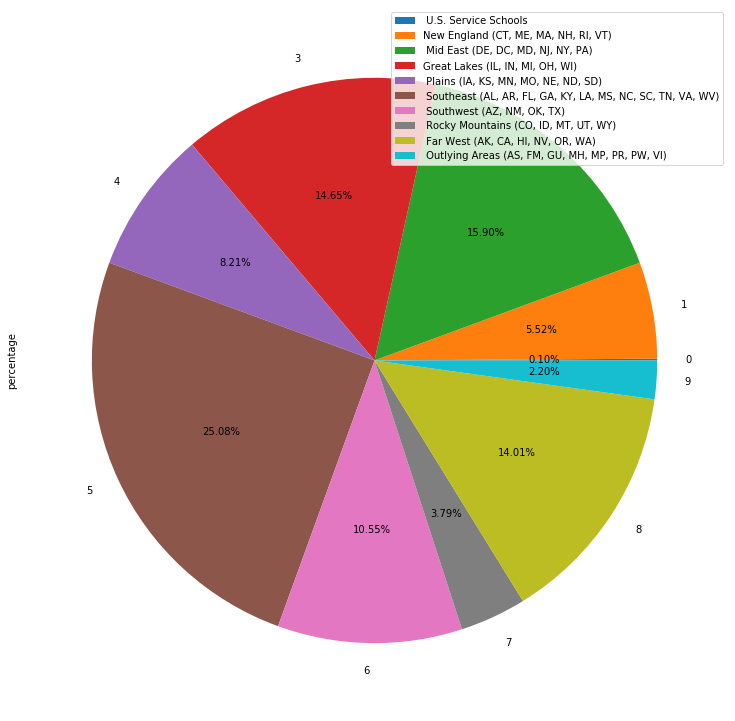

In [32]:
#creating a crosstab of regions represented in the dataset
regions=df.groupby('REGION').agg({'UNITID': 'count'})
reg_percent=pd.crosstab(index=df['REGION'],columns=df.REGION,normalize='columns',margins=True)
r_percent=reg_percent.All
regions['percentage']= r_percent
regions['labels'] =[' U.S. Service Schools','New England (CT, ME, MA, NH, RI, VT)',' Mid East (DE, DC, MD, NJ, NY, PA)','Great Lakes (IL, IN, MI, OH, WI)',' Plains (IA, KS, MN, MO, NE, ND, SD)'
,' Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',' Southwest (AZ, NM, OK, TX)',' Rocky Mountains (CO, ID, MT, UT, WY)',' Far West (AK, CA, HI, NV, OR, WA)',' Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)']
regions

pieplot = regions.plot(kind='pie',y='percentage',figsize=(13,13),autopct='%1.2f%%')
plt.legend(regions.labels)

In [13]:
#crosstab of types of institions in dataset: public,private
owner=df.groupby('CONTROL').agg({'UNITID': 'count'})
owner_percent=pd.crosstab(index=df['CONTROL'],columns=df.LOCALE,normalize='columns',margins=True)
o_percent=owner_percent.All
owner['percentage']= o_percent
owner['labels']= ['Public','Private nonprofit','Private for-profit']
owner

,UNITID,percentage,labels
CONTROL,,,
1,6251,0.31,Public
2,6088,0.29,Private nonprofit
3,8817,0.39,Private for-profit


In [16]:
#number of institutions serving certain demographics
print("There are",len(df.loc[df['HBCU']==1]),"historically black institutions.")
print("There are",len(df.loc[df['PBI']==1]),"predominantly black institutions.")
print("There are",len(df.loc[df['ANNHI']==1]),"Alaska Native, Native Hawaiian serving institutions.")
print("There are",len(df.loc[df['TRIBAL']==1]),"tribal colleges and universities.")
print("There are",len(df.loc[df['AANAPII']==1]),"Asian American, Native American, and Pacific Islander serving institutions.")
print("There are",len(df.loc[df['HSI']==1]),"Hispanic serving institutions.")
print("There are",len(df.loc[df['NANTI']==1]),"Native American non-tribal institutions")
print("There are",len(df.loc[df['MENONLY']==1]),"men only colleges.")
print("There are",len(df.loc[df['WOMENONLY']==1]),"women only colleges.")

There are 100 historically black institutions.
There are 101 predominantly black institutions.
There are 36 Alaska Native, Native Hawaiian serving institutions.
There are 35 tribal colleges and universities.
There are 162 Asian American, Native American, and Pacific Islander serving institutions.
There are 461 Hispanic serving institutions.
There are 28 Native American non-tribal institutions
There are 62 men only colleges.
There are 35 women only colleges.


**Admissions**:
This group of data elements describes each institution's individual acceptance rate, as well as the averages of SAT/ACT scores of admitted students. There are many missing values for the particular admission rate column used below with a count of only 6,084 of 21,156 rows but from what is provied, the admission rates in the file range from 0% to 100% with a median of 70% and a similar average of 68% admission so the values that are not null are well distributed.

In [17]:
#taking a look at admission rates
df.ADM_RATE.describe()

count   6084.00
mean       0.68
std        0.21
min        0.00
25%        0.55
50%        0.70
75%        0.84
max        1.00
Name: ADM_RATE, dtype: float64

**Academics**:
This group of data elements describes the type of majors the school offers and the number of degrees and certifications they offer. There are 38 different subjects for percentage of degrees awarded included in the file.

In [18]:
#getting the number of different types of degrees awarded 
#taken from the columns of the dataset starting with "PCIP" which contain the percentage of degrees awarded in x subject
degrees = [col for col in df.columns if 'PCIP' in col]
print(len(degrees))

38


**Student**: The files also includes multiple factors that identify the demographics of the student body attending a particular university as well as the number of undergraduate students enrolled in the Fall. The average percentage of male students is 35% and the average percentage of female students enrolled in is 65%.

In [20]:
df.UGDS_MEN.describe()

count   18899.00
mean        0.35
std         0.24
min         0.00
25%         0.14
50%         0.37
75%         0.47
max         1.00
Name: UGDS_MEN, dtype: float64

In [21]:
df.UGDS_WOMEN.describe()

count   18899.00
mean        0.65
std         0.24
min         0.00
25%         0.53
50%         0.63
75%         0.86
max         1.00
Name: UGDS_WOMEN, dtype: float64


**Financial**

---

**Costs**: Data in this category explores many financial aspects of the institutions including cost of attendance, financial aid, in-state and out-of-state tuition, and average net price of attendance. The data contains many categories for detailing financial aid including federal loans and Pell Grants. The average cost of attendance for the institution's academic year, which includes tuition, fees, and other expenses ranges from \\$3,930 to \\$96,375 with a median of \\$22,616. The file also contains information on the amount of loan debt a student acrues.

In [22]:
df.COSTT4_A.describe()

count   10671.00
mean    26356.17
std     15062.20
min      3930.00
25%     14001.00
50%     22616.00
75%     34345.50
max     96375.00
Name: COSTT4_A, dtype: float64

**Completion and Retention**: 
These groups of data elements measure the completion rate of a particular university. They measure other related factors like student loan repayment and if a graduate has found a job. 

###  Data Quality Assurance Plan

Our treament of the null and NaN values within the columns we are interested in is to remove them given the size of the dataset and the limited time we have had to truly examine and explore the set. Missing data within those values will affect our distributions and correlations.

For every row that is missing the data that we need, we will factor them out. This is because we want to find universities with relevant information and any university without information regarding SAT Math isn't need in our analysis. As the dataset has many columns, a majority of which we will not be needing, so rows with null values in those columns will not need to be addressed. 

When comparing the percentage of degrees awarded,while not transforming the datatype itself, we will be assigning boolean values based if the degree would fall under the STEM category or not. 

## SECTION 3: Quality Assurance Plan Execution

Using the College Scorecard dataset provided, our team was interesting in look at how SAT Math scores of admitted students of an institution and how it may correlate to the amount of STEM degrees that institution awards. After calling just the head of the file with the first 15 rows, there are three rows of each of the schools in our dataframe with indentical UNITID's and OPEID's since the dataset is a merged file from 2017 to 2019 with one row of each school for each year included. The UNITID's and OPEID's would serve as unique identifiers however the multiplicity of the rows nullified that. In order to remedy this as well as due to the size of the file, we decided to obtain only one row for each school. We removed the duplicate using the 'CCBASIC' Carnegie Foundation classifier which was not null for only one row per distinct institution. It was also observed by looking through the dataset that the rows with this identifier value had less null values in other columns so these were the rows we chose to keep as it reduces the nulls in other columns as well. This leaves us with 6,331 institutions of the original 21,156 rows of the dataset.

Since our hypothesis is based on the STEM degrees awared as well as SAT scores, we wanted to limit our analysis to only four year instituitons where bachelor degrees were predominantly awarded using the categorical 'PREDDEG' column since we did not want to include instituations mainly awarding certificates or higher degrees as SAT scores would be less relevant there. This brought our row count to 2,058 institutions. Since we specifically wanted to look at the median SAT Math score for admission, and given the time constraint and unfamiliarity with the dataset, we chose to removed all rows that did not contain a value for the 'SATMTMID' row rather than fill it with a mean or median. Filling the nulls with the mean or median would could have affected the correlations and distributions we are to find so we chose not to do that. Using the CCBASIC classifier helped us eliminate rows with many missing values, any row the still has missing values at this stage can still remain since we would not need to examine or analyze those columns for our purposes. 

Using the describe function to obtain the deciles of the Median SAT Math score('SATMTMID'), we determined that our target variable will be the highest decile, where the median SAT Math score for those institutions is greater than 660. We coded those in the 90th percentile which we label as high scorers as 1 and those below as 0. We found that 126 institutions are within our target and 1,081 are not. 

In [23]:
df.head(15)

,Unnamed: 0,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,...,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,YEAR
0,9,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,...,0.74,0.75,4865.00,1292.00,1473.00,nan,NaN,NaN,nan,2019
1,0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,...,0.71,0.71,5343.00,1165.00,1288.00,2.00,0.7083,0.7287,2698.00,2017
2,0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,...,0.71,0.74,5207.00,1185.00,1410.00,nan,NaN,NaN,nan,2018
3,10,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,...,0.34,0.49,13440.00,8114.00,1593.00,nan,NaN,NaN,nan,2019
4,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,...,0.40,0.55,13308.00,9888.00,1948.00,nan,NaN,NaN,nan,2018
5,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,...,0.38,0.54,14445.00,10498.00,2228.00,2.00,0.3891,0.5414,4176.00,2017
6,2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,...,1.00,1.00,440.00,527.00,5.00,4.00,PrivacySuppressed,PrivacySuppressed,24.00,2017
7,11,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,...,0.83,1.00,415.00,415.00,6.00,nan,NaN,NaN,nan,2019
8,2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,...,0.50,0.50,431.00,437.00,4.00,nan,NaN,NaN,nan,2018
9,3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,...,0.20,0.42,7519.00,2378.00,1203.00,nan,NaN,NaN,nan,2018


In [24]:
#obtaining one row for each institution using the Carnegie Classification identifier
df_1school=df.dropna(how='all',subset=['CCBASIC'])
df_1school.shape

(6331, 1988)

In [25]:
#obtaining only 4 year, bachelor degree granting institutuions 
fouryearuni = (df_1school.loc[df_1school['PREDDEG']==3])
fouryearuni.shape

(2058, 1988)

In [26]:
#dropping all rows that have null values in our target column of median SAT Math scores
satmath = fouryearuni.dropna(how='all', subset=['SATMTMID'])
satmath['SATMTMID']

1       465.00
5       555.00
11      565.00
13      465.00
16      580.00
         ...  
19096   580.00
19111   595.00
19213   515.00
19539   485.00
19661   490.00
Name: SATMTMID, Length: 1207, dtype: float64

In [27]:
#generating deciles for our target column
sat_deciles=satmath['SATMTMID'].describe(percentiles=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
sat_deciles

count   1207.00
mean     561.76
std       69.68
min      370.00
0%       370.00
10%      490.00
20%      507.40
30%      525.00
40%      535.00
50%      550.00
60%      565.00
70%      580.00
80%      607.60
90%      660.00
100%     795.00
max      795.00
Name: SATMTMID, dtype: float64

C:\Users\catdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


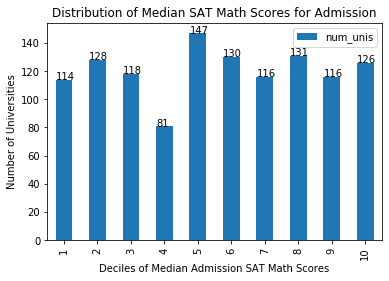

In [29]:
def scorebands (satmath):
    if satmath['SATMTMID']< 490: return 1
    elif (satmath['SATMTMID']>= 490 and satmath['SATMTMID']<507.4): return 2
    elif (satmath['SATMTMID']>= 507.4 and satmath['SATMTMID']<525): return 3
    elif (satmath['SATMTMID']>= 525 and satmath['SATMTMID']<535): return 4
    elif (satmath['SATMTMID']>= 535 and satmath['SATMTMID']<550): return 5
    elif (satmath['SATMTMID']>= 550 and satmath['SATMTMID']<565): return 6
    elif (satmath['SATMTMID']>= 565 and satmath['SATMTMID']<580): return 7
    elif (satmath['SATMTMID']>= 580 and satmath['SATMTMID']<607): return 8
    elif (satmath['SATMTMID']>= 607 and satmath['SATMTMID']<660): return 9
    elif (satmath['SATMTMID']>= 660 and satmath['SATMTMID']<=795): return 10
    else : return 99
    
satmath['SATMath_grps']=satmath.apply(scorebands,axis=1)
satmath_counts=satmath.groupby('SATMath_grps').agg({'UNITID': 'count'})
satmath_counts.rename(columns={satmath_counts.columns[0]:"num_unis"},inplace= True)

satmath_counts.plot(kind='bar')
plt.title("Distribution of Median SAT Math Scores for Admission")
plt.xlabel("Deciles of Median Admission SAT Math Scores")
plt.ylabel('Number of Universities')

y=satmath_counts['num_unis']
for i,v in enumerate(y):
    plt.text(i-.25,v+0.01,str(v))
plt.show()

C:\Users\catdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


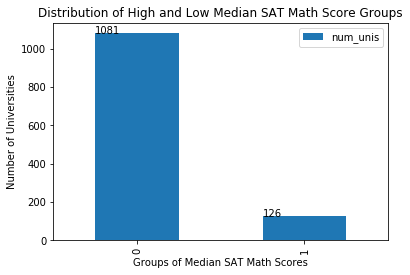

In [30]:
#defining our target variable as institutions in the 90th percentile with a SAT Math score higher than 660
def highmathscore(satmath):
    if satmath['SATMTMID'] < 660 : return 0
    else: return 1
satmath['targetscore'] = satmath.apply(highmathscore,axis=1)
satmath_grped=satmath.groupby('targetscore').agg({'UNITID': 'count'})
satmath_grped.rename(columns={satmath_grped.columns[0]:"num_unis"},inplace= True)

satmath_grped.plot(kind='bar')
plt.title("Distribution of High and Low Median SAT Math Score Groups")
plt.xlabel("Groups of Median SAT Math Scores")
plt.ylabel('Number of Universities')

y=satmath_grped['num_unis']
for i,v in enumerate(y):
    plt.text(i-.25,v+0.01,str(v))
plt.show()

This graph shows the distribution of institutions within our coded groups of lower SAT Math scores (0) and higher SAT Math scores (1). We chose our target to determine a high SAT Math score to be those in the 90th percentile which was an admission score of above 660. All scores below this are coded as 0.

In [31]:
#creating counts and percentages for those in our target and not
targetscorepercent=pd.crosstab(index=satmath['targetscore'],columns=satmath.targetscore,normalize='columns',margins=True)
t_percent=targetscorepercent.iloc[:,2]
satmath_grped['percentage']= t_percent
satmath_grped

,num_unis,percentage
targetscore,,
0,1081,0.90
1,126,0.10



## SECTION 4: Exploratory Data Analysis

In order to reject or accept our hypothesis, we have chosen two STEM degree features, percentage of degrees awarded in Math and Statistics (PCIP27) and Computer Science(PCIP11), and two non-stem degree features, percentage of degrees awarded in Business (PCIP52) and Psychology (PCIP42). We additionally wanted to look at the regions of the institutions and how that may play a roll in these percentages.

In [34]:
#viewing the distribution of percentage of math degrees awarded.
pd.options.display.float_format = '{:.4f}'.format
math_deciles=satmath['PCIP27'].describe(percentiles=[0,.25,.50,.75,.80,.85,.9,.95,.96,.97,.98,.99,1])
math_deciles

count   1207.0000
mean       0.0124
std        0.0147
min        0.0000
0%         0.0000
25%        0.0031
50%        0.0085
75%        0.0158
80%        0.0184
85%        0.0227
90%        0.0276
95%        0.0406
96%        0.0443
97%        0.0479
98%        0.0577
99%        0.0729
100%       0.1307
max        0.1307
Name: PCIP27, dtype: float64

C:\Users\catdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


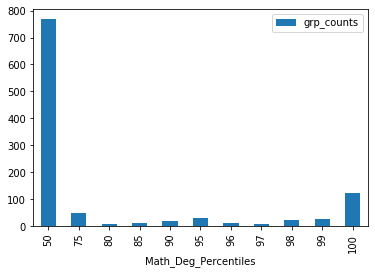

In [35]:
def mathdeg (satmath):
    if satmath['PCIP14']< 0.0085: return 50
    elif (satmath['PCIP14']>= 0.0085 and satmath['PCIP14']<0.0158): return 75
    elif (satmath['PCIP14']>= 0.0158 and satmath['PCIP14']<0.0184): return 80
    elif (satmath['PCIP14']>= 0.0184 and satmath['PCIP14']<0.0227): return 85
    elif (satmath['PCIP14']>= 0.0227 and satmath['PCIP14']<0.0276): return 90
    elif (satmath['PCIP14']>= 0.0276 and satmath['PCIP14']<0.0406): return 95
    elif (satmath['PCIP14']>= 0.0406 and satmath['PCIP14']<0.0443): return 96
    elif (satmath['PCIP14']>= 0.0443 and satmath['PCIP14']<0.0479): return 97
    elif (satmath['PCIP14']>= 0.0479 and satmath['PCIP14']<0.0577): return 98
    elif (satmath['PCIP14']>= 0.0577 and satmath['PCIP14']<0.0729): return 99
    elif (satmath['PCIP14']>= 0.0729 and satmath['PCIP14']<0.1307): return 100
    else : return 999
    
satmath['Math_Deg_Percentiles']=satmath.apply(mathdeg,axis=1)
mathdeg_counts=satmath.groupby('Math_Deg_Percentiles').agg({'UNITID': 'count'})
mathdeg_counts.rename(columns={mathdeg_counts.columns[0]:"grp_counts"},inplace= True)

distribution_of_math = mathdeg_counts.iloc[:-1]
distribution_of_math.plot(kind='bar')

The distribution of percentages of Math and Statistics degrees awarded is the most irregular out of all the features looked at with 121 institutions in the top 1% of percentage of degrees awarded, the most in the top 1% of any degree looked at. All other distribution of degrees see a consistent and similar trend of decreasing numbers of institutions in each percentile as they move toward 100%.

In [36]:
#viewing the distribution of percentage of CS degrees awarded.
cs_deciles=satmath['PCIP11'].describe(percentiles=[0,.25,.50,.75,.80,.85,.9,.95,.96,.97,.98,.99,1])
cs_deciles

count   1207.0000
mean       0.0302
std        0.0444
min        0.0000
0%         0.0000
25%        0.0021
50%        0.0210
75%        0.0383
80%        0.0435
85%        0.0514
90%        0.0652
95%        0.0925
96%        0.1061
97%        0.1203
98%        0.1468
99%        0.2083
100%       0.5320
max        0.5320
Name: PCIP11, dtype: float64

C:\Users\catdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


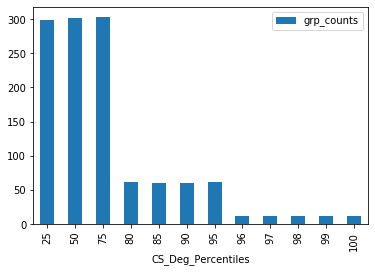

In [37]:
def csdeg (satmath):
    if satmath['PCIP11']< 0.0021: return 25
    elif (satmath['PCIP11']>= 0.0021 and satmath['PCIP11']<0.0210): return 50
    elif (satmath['PCIP11']>= 0.0210 and satmath['PCIP11']<0.0383): return 75
    elif (satmath['PCIP11']>= 0.0383 and satmath['PCIP11']<0.0435): return 80
    elif (satmath['PCIP11']>= 0.0435 and satmath['PCIP11']<0.0514): return 85
    elif (satmath['PCIP11']>= 0.0514 and satmath['PCIP11']<0.0652): return 90
    elif (satmath['PCIP11']>= 0.0652 and satmath['PCIP11']<0.0925): return 95
    elif (satmath['PCIP11']>= 0.0925 and satmath['PCIP11']<0.1061): return 96
    elif (satmath['PCIP11']>= 0.1061 and satmath['PCIP11']<0.1203): return 97
    elif (satmath['PCIP11']>= 0.1203 and satmath['PCIP11']<0.1468): return 98
    elif (satmath['PCIP11']>= 0.1468 and satmath['PCIP11']<0.2083): return 99
    elif (satmath['PCIP11']>= 0.2083 and satmath['PCIP11']<0.5320): return 100
    else : return 999
    
satmath['CS_Deg_Percentiles']=satmath.apply(csdeg,axis=1)
csdeg_counts=satmath.groupby('CS_Deg_Percentiles').agg({'UNITID': 'count'})
csdeg_counts.rename(columns={csdeg_counts.columns[0]:"grp_counts"},inplace= True)

distribution_of_cs = csdeg_counts.iloc[:-1]
distribution_of_cs.plot(kind='bar')

In [38]:
#viewing the distribution of percentage of Business degrees awarded.
bus_deciles=satmath['PCIP52'].describe(percentiles=[0,.25,.50,.75,.80,.85,.9,.95,.96,.97,.98,.99,1])
bus_deciles

count   1207.0000
mean       0.1814
std        0.1167
min        0.0000
0%         0.0000
25%        0.1205
50%        0.1759
75%        0.2340
80%        0.2513
85%        0.2732
90%        0.2982
95%        0.3701
96%        0.3901
97%        0.4145
98%        0.4459
99%        0.5368
100%       1.0000
max        1.0000
Name: PCIP52, dtype: float64

C:\Users\catdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


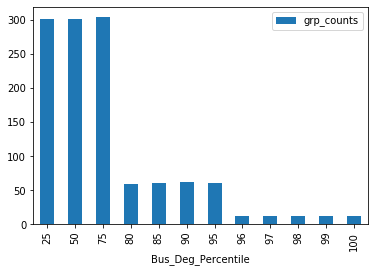

In [40]:
def busdeg (satmath):
    if satmath['PCIP52']< 0.1205: return 25
    elif (satmath['PCIP52']>= 0.1205 and satmath['PCIP52']<0.1759): return 50
    elif (satmath['PCIP52']>= 0.1759 and satmath['PCIP52']<0.2340): return 75
    elif (satmath['PCIP52']>= 0.2340 and satmath['PCIP52']<0.2513): return 80
    elif (satmath['PCIP52']>= 0.2513 and satmath['PCIP52']<0.2732): return 85
    elif (satmath['PCIP52']>= 0.2732 and satmath['PCIP52']<0.2982): return 90
    elif (satmath['PCIP52']>= 0.2982 and satmath['PCIP52']<0.3701): return 95
    elif (satmath['PCIP52']>= 0.3701 and satmath['PCIP52']<0.3901): return 96
    elif (satmath['PCIP52']>= 0.3901 and satmath['PCIP52']<0.4145): return 97
    elif (satmath['PCIP52']>= 0.4145 and satmath['PCIP52']<0.4459): return 98
    elif (satmath['PCIP52']>= 0.4459 and satmath['PCIP52']<0.5368): return 99
    elif (satmath['PCIP52']>= 0.5368 and satmath['PCIP52']<1.0000): return 100
    else : return 999
    
satmath['Bus_Deg_Percentile']=satmath.apply(busdeg,axis=1)
busdeg_counts=satmath.groupby('Bus_Deg_Percentile').agg({'UNITID': 'count'})
busdeg_counts.rename(columns={busdeg_counts.columns[0]:"grp_counts"}, inplace= True)

distribution_of_bus = busdeg_counts.iloc[:-1]
distribution_of_bus.plot(kind='bar')

In [41]:
#viewing the distribution of percentage of Psychology degrees awarded.
psy_deciles=satmath['PCIP42'].describe(percentiles=[0,.25,.50,.75,.80,.85,.9,.95,.96,.97,.98,.99,1])
psy_deciles

count   1207.0000
mean       0.0620
std        0.0423
min        0.0000
0%         0.0000
25%        0.0347
50%        0.0570
75%        0.0819
80%        0.0887
85%        0.0985
90%        0.1144
95%        0.1415
96%        0.1515
97%        0.1582
98%        0.1726
99%        0.2029
100%       0.2764
max        0.2764
Name: PCIP42, dtype: float64

C:\Users\catdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


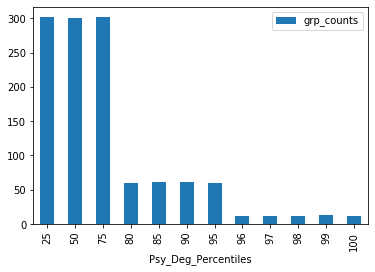

In [42]:
def psydeg (satmath):
    if satmath['PCIP42']< 0.0347: return 25
    elif (satmath['PCIP42']>= 0.0347 and satmath['PCIP42']<0.0570): return 50
    elif (satmath['PCIP42']>= 0.0570 and satmath['PCIP42']<0.0819): return 75
    elif (satmath['PCIP42']>= 0.0819 and satmath['PCIP42']<0.0887): return 80
    elif (satmath['PCIP42']>= 0.0887 and satmath['PCIP42']<0.0985): return 85
    elif (satmath['PCIP42']>= 0.0985 and satmath['PCIP42']<0.1144): return 90
    elif (satmath['PCIP42']>= 0.1144 and satmath['PCIP42']<0.1415): return 95
    elif (satmath['PCIP42']>= 0.1415 and satmath['PCIP42']<0.1515): return 96
    elif (satmath['PCIP42']>= 0.1515 and satmath['PCIP42']<0.1582): return 97
    elif (satmath['PCIP42']>= 0.1582 and satmath['PCIP42']<0.1726): return 98
    elif (satmath['PCIP42']>= 0.1726 and satmath['PCIP42']<0.2029): return 99
    elif (satmath['PCIP42']>= 0.2029 and satmath['PCIP42']<0.2764): return 100
    else : return 999
    
satmath['Psy_Deg_Percentiles']=satmath.apply(psydeg,axis=1)
psydeg_counts=satmath.groupby('Psy_Deg_Percentiles').agg({'UNITID': 'count'})
psydeg_counts.rename(columns={psydeg_counts.columns[0]:"grp_counts"},inplace= True)

distribution_of_psy = psydeg_counts.iloc[:-1]
distribution_of_psy.plot(kind='bar')

In [43]:
#generating Pearson correlation matrix grouped by our targetscore 
target_df = satmath[['SATMTMID','PCIP27','PCIP11','PCIP42','PCIP52','REGION','targetscore']]
target_df.rename(columns={"SATMTMID": "Median SAT Math Score", 'PCIP27': "% of Math Degrees Awarded", 
'PCIP11': "% of CS Degrees Awarded", 'PCIP42': "% of Psychology Degrees Awarded", 'PCIP52': "% of Business Degrees Awarded"}, inplace = True)
samp_corr=target_df.groupby('targetscore').corr(method='pearson')
samp_corr

C:\Users\catdo\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Median SAT Math Score  \
targetscore                                                          
0           Median SAT Math Score                           1.0000   
            % of Math Degrees Awarded                       0.2406   
            % of CS Degrees Awarded                         0.1446   
            % of Psychology Degrees Awarded                -0.1211   
            % of Business Degrees Awarded                  -0.1180   
            REGION                                         -0.0453   
1           Median SAT Math Score                           1.0000   
            % of Math Degrees Awarded                       0.4219   
            % of CS Degrees Awarded                         0.3681   
            % of Psychology Degrees Awarded                -0.2078   
            % of Business Degrees Awarded                  -0.2640   
            REGION                                         -0.1363   

                                             % of Math Degrees Awarded  \
targetscore                                                              
0           Median SAT Math Score                               0.2406   
            % of Math Degrees Awarded                           1.0000   
            % of CS Degrees Awarded                             0.0023   
            % of Psychology Degrees Awarded                     0.2338   
            % of Business Degrees Awarded                      -0.1058   
            REGION                                             -0.0107   
1           Median SAT Math Score                               0.4219   
            % of Math Degrees Awarded                           1.0000   
            % of CS Degrees Awarded                             0.2812   
            % of Psychology Degrees Awarded                     0.1810   
            % of Business Degrees Awarded                      -0.3152   
            REGION                                              0.0271   

                                             % of CS Degrees Awarded  \
targetscore                                                            
0           Median SAT Math Score                             0.1446   
            % of Math Degrees Awarded                         0.0023   
            % of CS Degrees Awarded                           1.0000   
            % of Psychology Degrees Awarded                  -0.0387   
            % of Business Degrees Awarded                    -0.0124   
            REGION                                           -0.0531   
1           Median SAT Math Score                             0.3681   
            % of Math Degrees Awarded                         0.2812   
            % of CS Degrees Awarded                           1.0000   
            % of Psychology Degrees Awarded                  -0.2854   
            % of Business Degrees Awarded                    -0.1799   
            REGION                                            0.0245   

                                             % of Psychology Degrees Awarded  \
targetscore                                                                    
0           Median SAT Math Score                                    -0.1211   
            % of Math Degrees Awarded                                 0.2338   
            % of CS Degrees Awarded                                  -0.0387   
            % of Psychology Degrees Awarded                           1.0000   
            % of Business Degrees Awarded                             0.0977   
            REGION                                                    0.0663   
1           Median SAT Math Score                                    -0.2078   
            % of Math Degrees Awarded                                 0.1810   
            % of CS Degrees Awarded                                  -0.2854   
            % of Psychology Degrees Awarded                           1.0000   
            % of Business Degrees Awarded                 

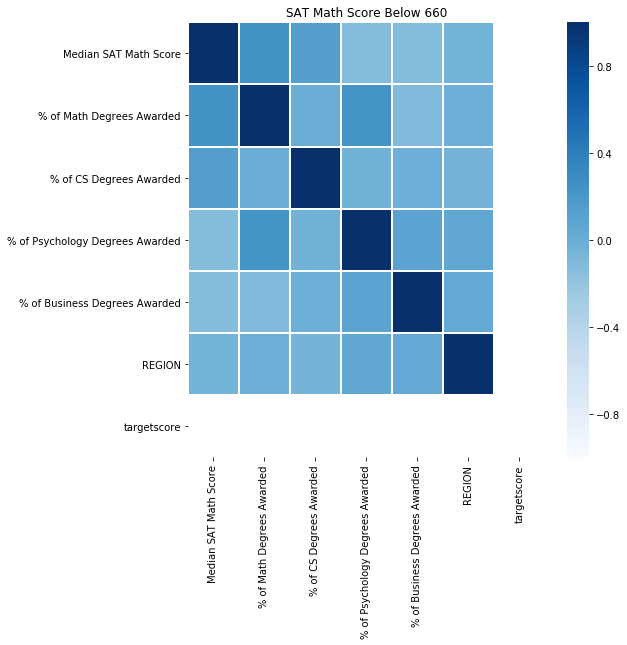

In [44]:
corr1=pd.DataFrame(target_df.loc[target_df.targetscore == 0])
fig, ax=plt.subplots(sharex=True, figsize=(8,8))
title= "SAT Math Score Below 660"
ax.set_title(title)
sns.heatmap(corr1.corr(method='pearson'), vmin=-1, vmax=1, cmap='Blues', linewidths=1)

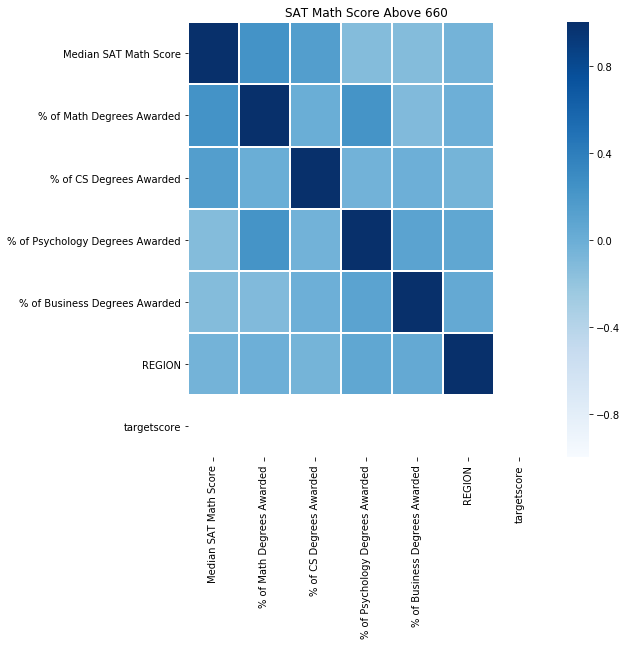

In [45]:
corr2=pd.DataFrame(target_df.loc[target_df.targetscore == 1])
fig, ax=plt.subplots(sharex=True, figsize=(8,8))
title= "SAT Math Score Above 660"
ax.set_title(title)
sns.heatmap(corr1.corr(method='pearson'), vmin=-1, vmax=1, cmap='Blues', linewidths=1)

Viewing only the heatmaps generated for the high scoring institutions (targetscore = 1) and low scoring institutions (targetscore = 0), there is does not seem to be a large difference between the two. However, viewing the matrix of Pearson correlation coefficients, we see that the correlations between Median SAT Math Score and percentage of STEM degrees awarded, here Math and Computer Science, are stronger for institutions in our target group than those not in the group. The former having an r of **.4219** for Math degrees and **.3681** for CS degrees and the latter having an r of **.2406** for Math degrees and **.1446** for CS degrees. Additionally those in our target group with higher median SAT Math scores have a stronger negative correlation with percentage of Psychology and Business Degrees awarded (**-.2078** and **-.264** respectively) compared with those in the lower Median SAT Math score group( **-.1211** and **-.1180** respectively) however it is ambiguous whether or not the correlation of SAT Math scores and those degrees are truly significant. Within the lower SAT Math scoring group, the strongest correlation between degree types is the percentage of Psychology and Math degrees with an r of **.2338** while in the higher SAT Math scoring group that same correlation weaker at  **.1810** though both are ambiguous. Within the target group the strongest correlation between degree types is Math and Computer Science with an r of **-.3152** showing a significant negative correlation between Math degrees and Business degrees awarded.

Looking at the relationship of each feature and the region reveals insignificant correlation coefficient. This is expected since the region feature is categorical rather than quantitative, thus the Pearson correlation method would not produce meaningful coefficients for this feature. 

These correlations support our null hypothesis that institutions with higher SAT Math admission scores will have a higher percentage of degrees awarded in STEM degrees. 